In [3]:
import pandas as pd
dataset1 = pd.read_csv('cropSMCP.csv')
dataset2 = pd.read_csv('Crop_recommendation.csv')

In [4]:
df = pd.DataFrame(dataset1)
df1 = pd.DataFrame(dataset2)
combined_df = pd.concat([df, df1], ignore_index=True)
sorted_df = combined_df.sort_values('label')
print(sorted_df)

        N   P   K  temperature   humidity        ph   rainfall       label
5264   52  73  79    17.257695  18.749440  7.840339  94.002872   Soyabeans
5247   27  76  83    19.128294  14.922415  6.289614  89.618578   Soyabeans
5248   57  60  84    19.103428  17.261845  6.586777  75.491012   Soyabeans
5249   52  68  78    17.485041  16.960706  6.896552  86.050780   Soyabeans
5250   43  79  79    19.407517  18.980305  7.806748  80.250646   Soyabeans
...   ...  ..  ..          ...        ...       ...        ...         ...
97     98   8  51    26.179346  86.522581  6.399669  55.740736  watermelon
92     29  51  24    24.313350  87.474091  7.393899  61.329356  watermelon
2077  111   6  45    26.493065  88.591431  6.417012  57.267730  watermelon
3329  115  23  46    24.415927  89.396555  6.286388  49.523207  watermelon
6019  103  17  51    25.111892  80.026213  6.209888  44.206570  watermelon

[6697 rows x 8 columns]


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
ds = sorted_df
ds.head()

,N,P,K,temperature,humidity,ph,rainfall,label
5264,52,73,79,17.257695,18.749440,7.840339,94.002872,Soyabeans
5247,27,76,83,19.128294,14.922415,6.289614,89.618578,Soyabeans
5248,57,60,84,19.103428,17.261845,6.586777,75.491012,Soyabeans
5249,52,68,78,17.485041,16.960706,6.896552,86.050780,Soyabeans
5250,43,79,79,19.407517,18.980305,7.806748,80.250646,Soyabeans


In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6697 entries, 5264 to 6019
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            6697 non-null   int64  
 1   P            6697 non-null   int64  
 2   K            6697 non-null   int64  
 3   temperature  6697 non-null   float64
 4   humidity     6697 non-null   float64
 5   ph           6697 non-null   float64
 6   rainfall     6697 non-null   float64
 7   label        6697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 470.9+ KB


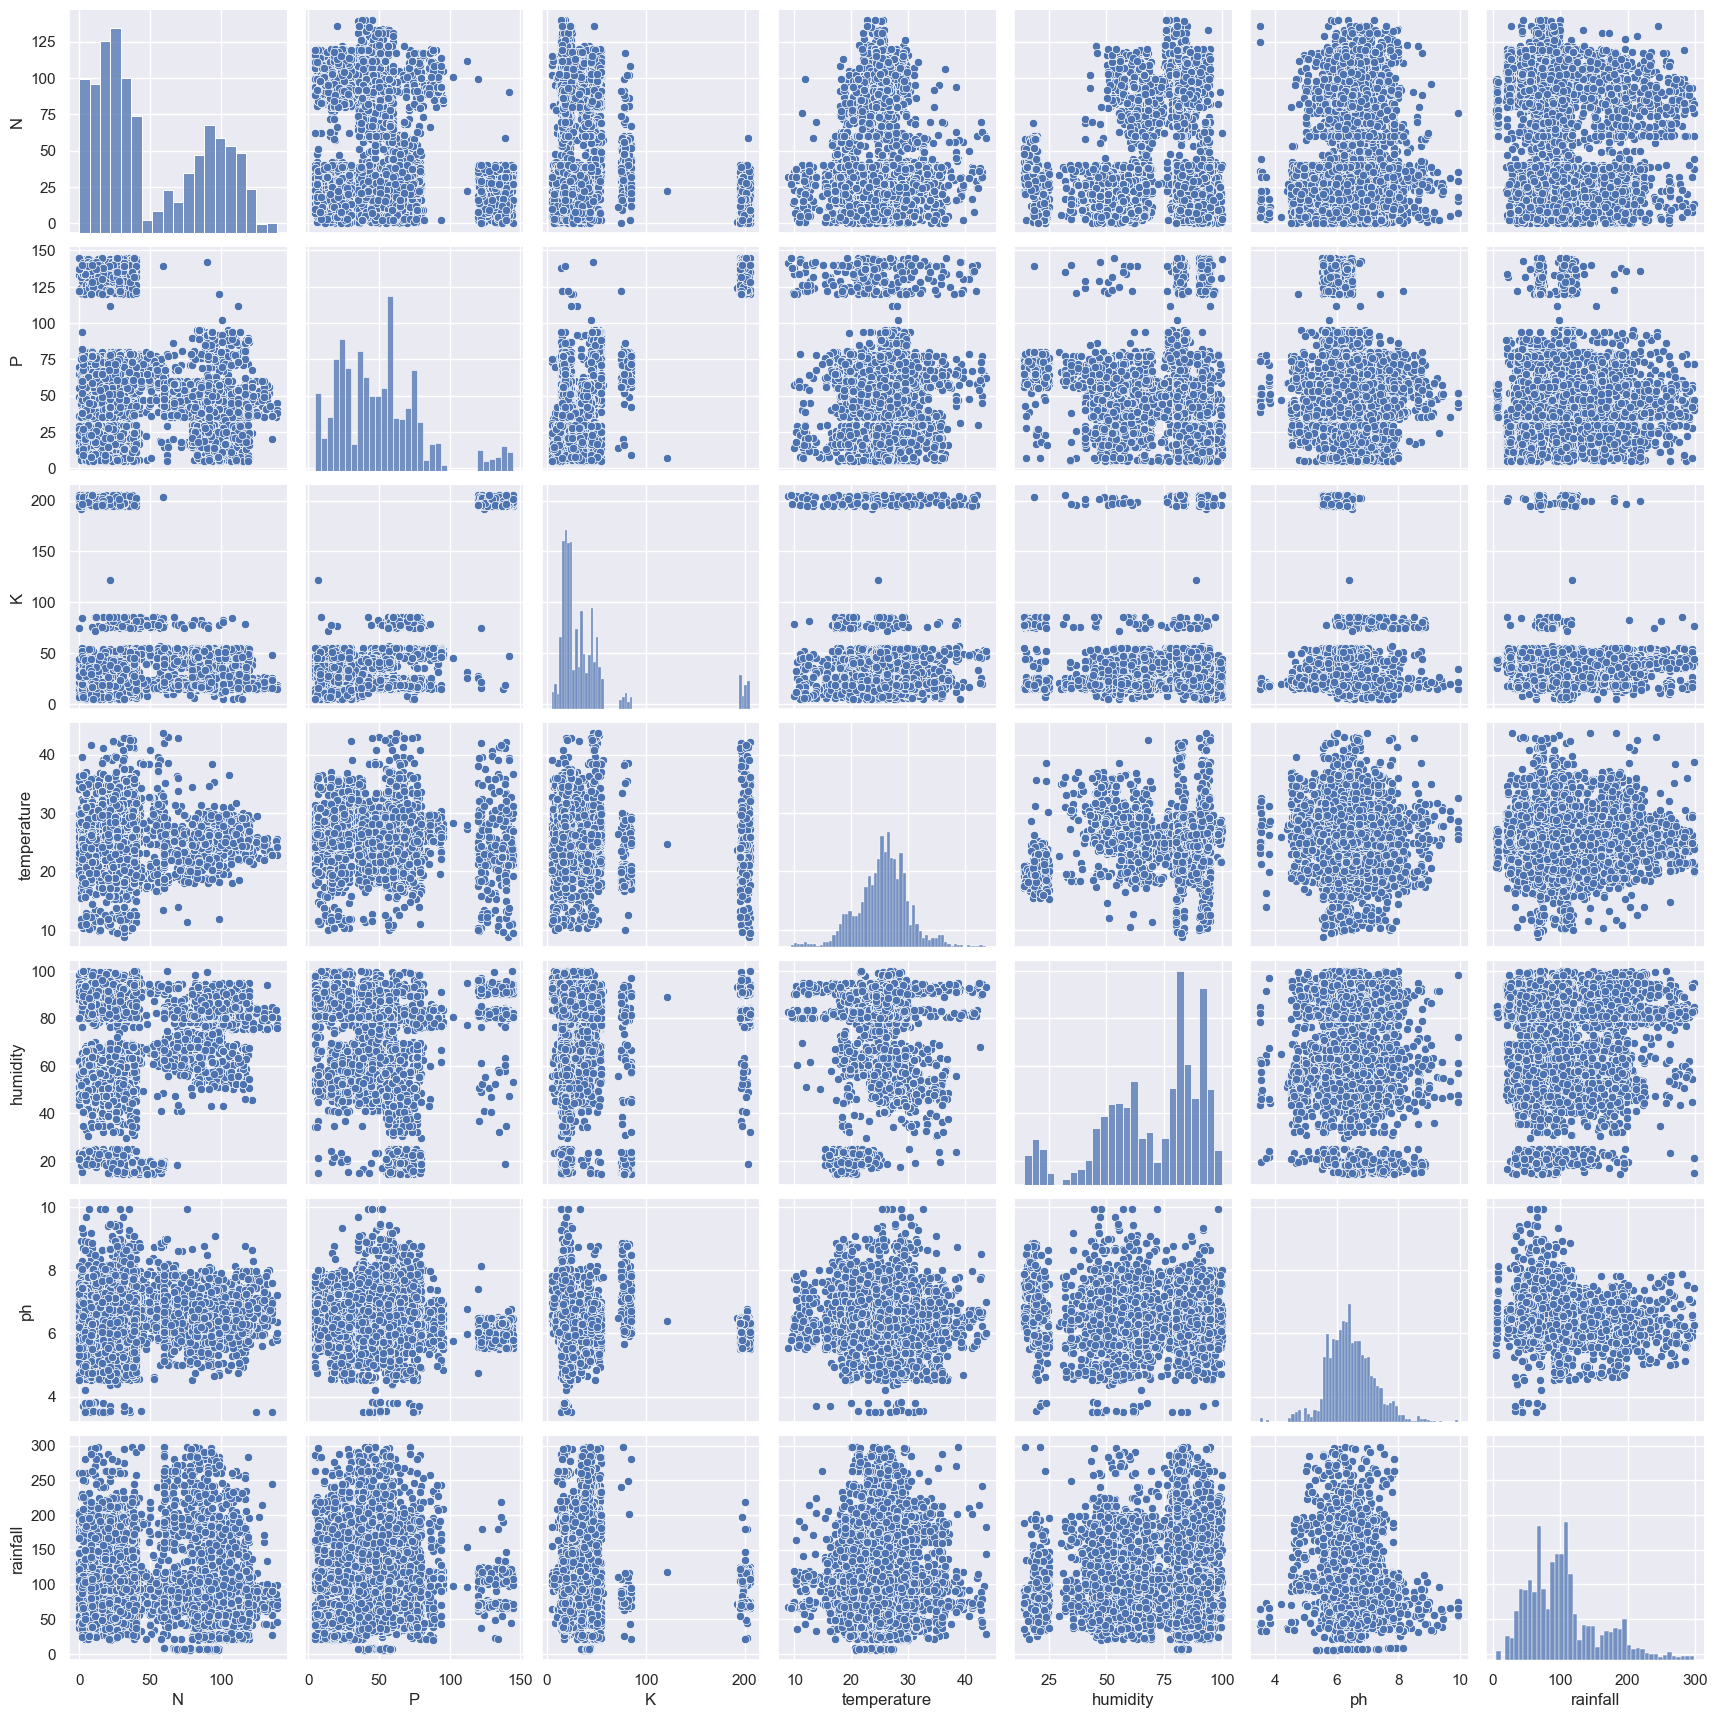

In [29]:
sns.pairplot(ds)
plt.show()

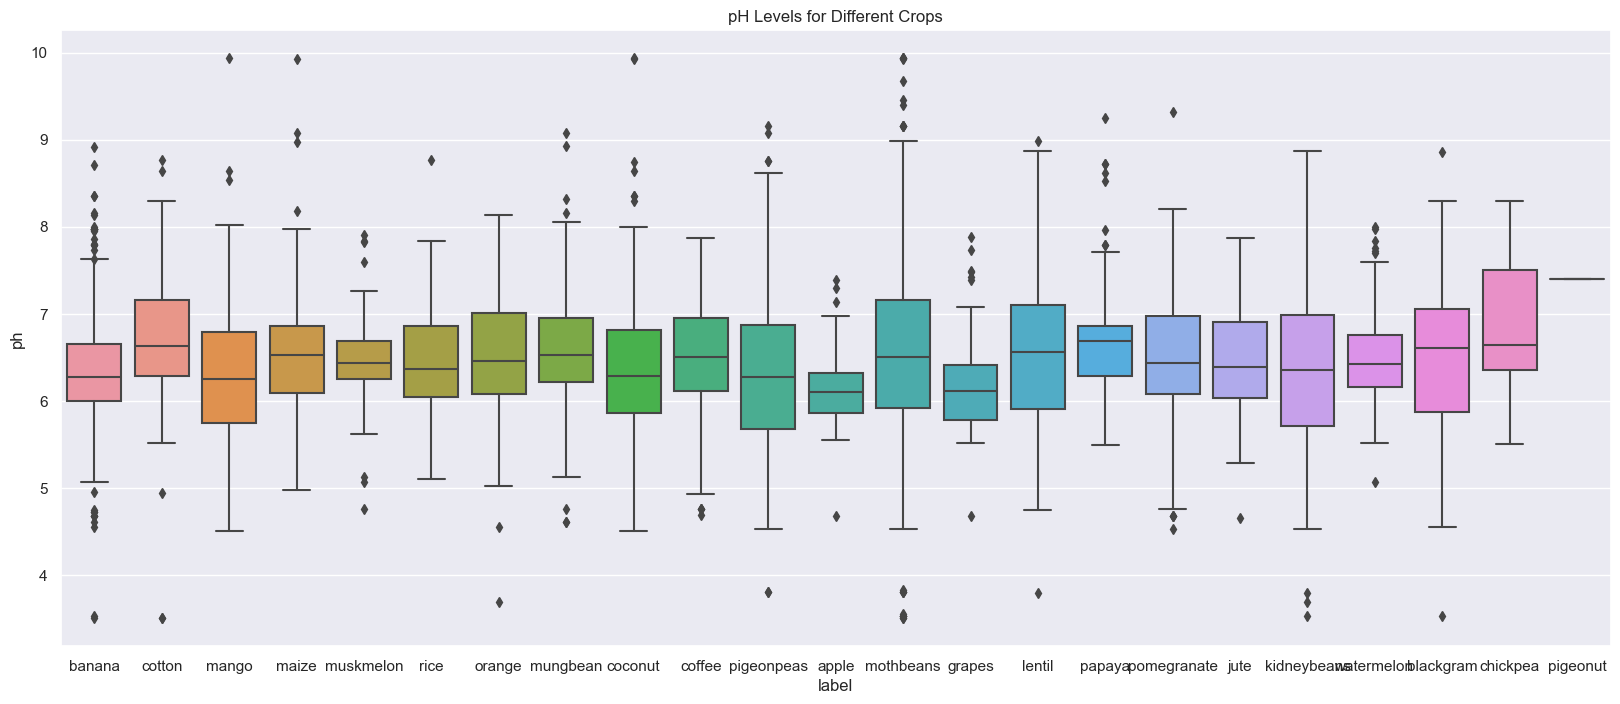

In [20]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='label', y='ph', data=df)
plt.title('pH Levels for Different Crops')
plt.show()

C:\Users\ZaK_ARia\AppData\Local\Temp\ipykernel_3664\1810223605.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


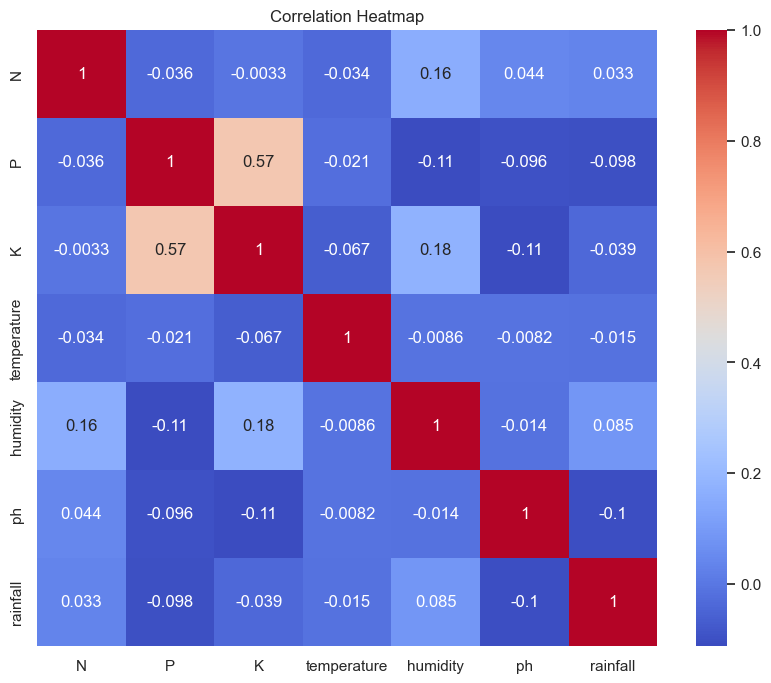

In [21]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

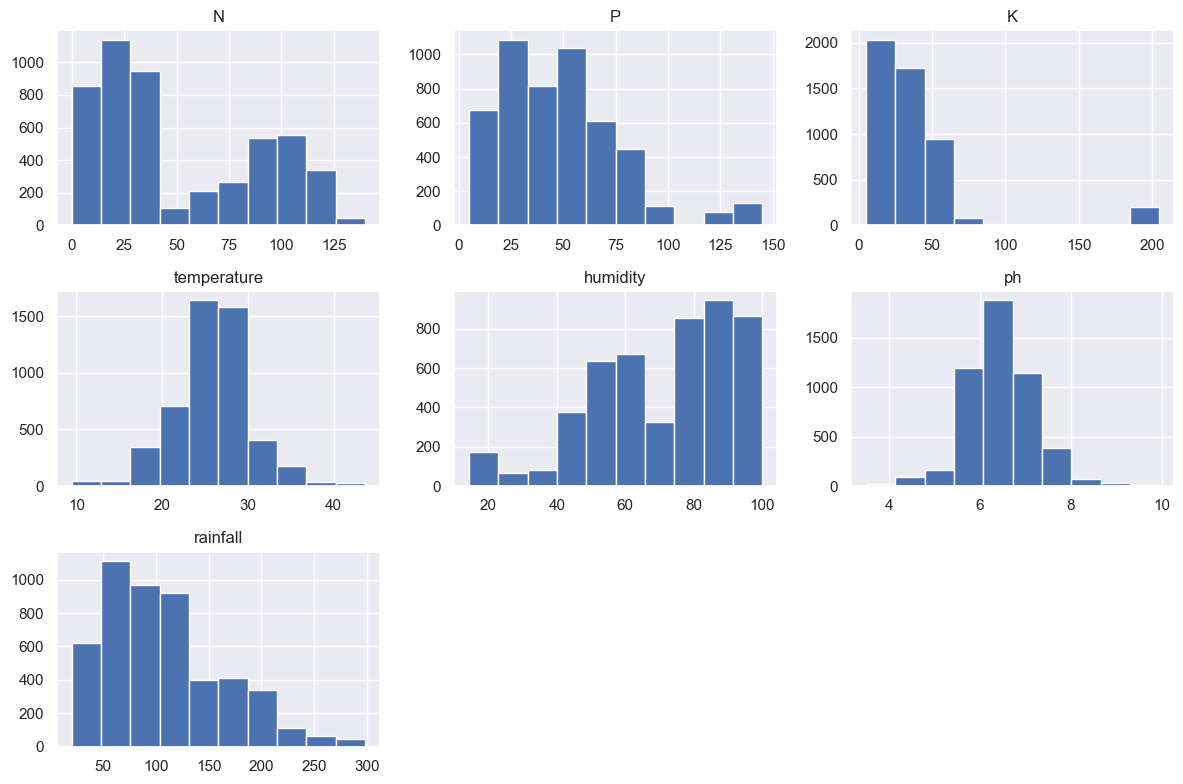

In [22]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

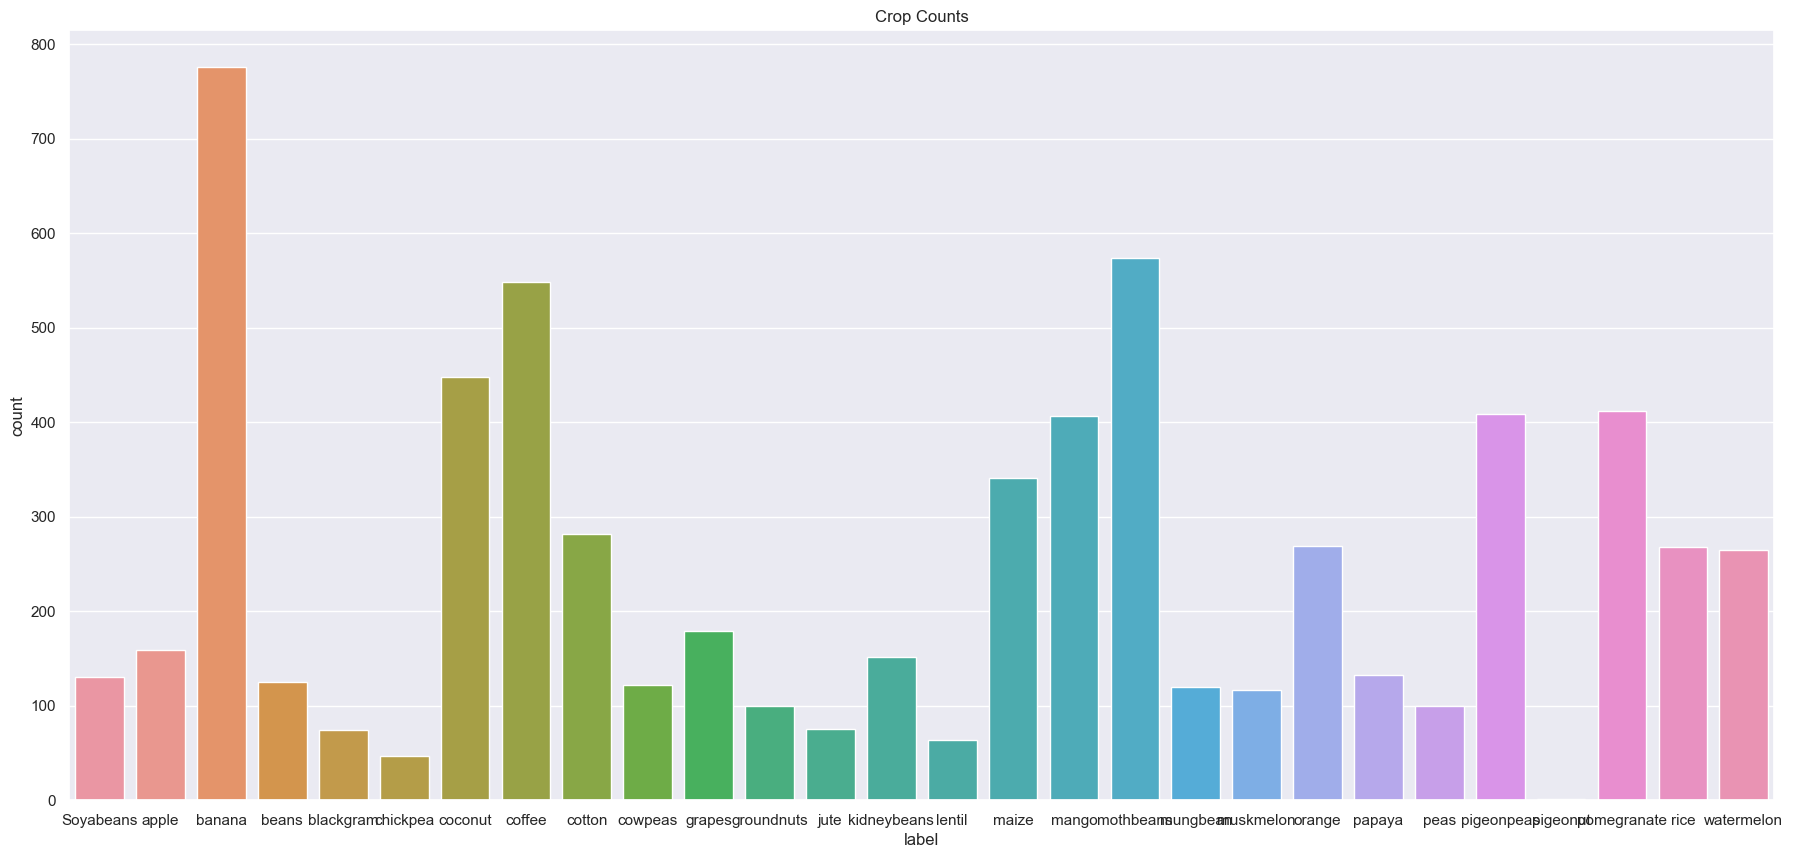

In [27]:
plt.figure(figsize=(22, 10))
sns.countplot(x='label', data=ds)
plt.title('Crop Counts')
plt.show()


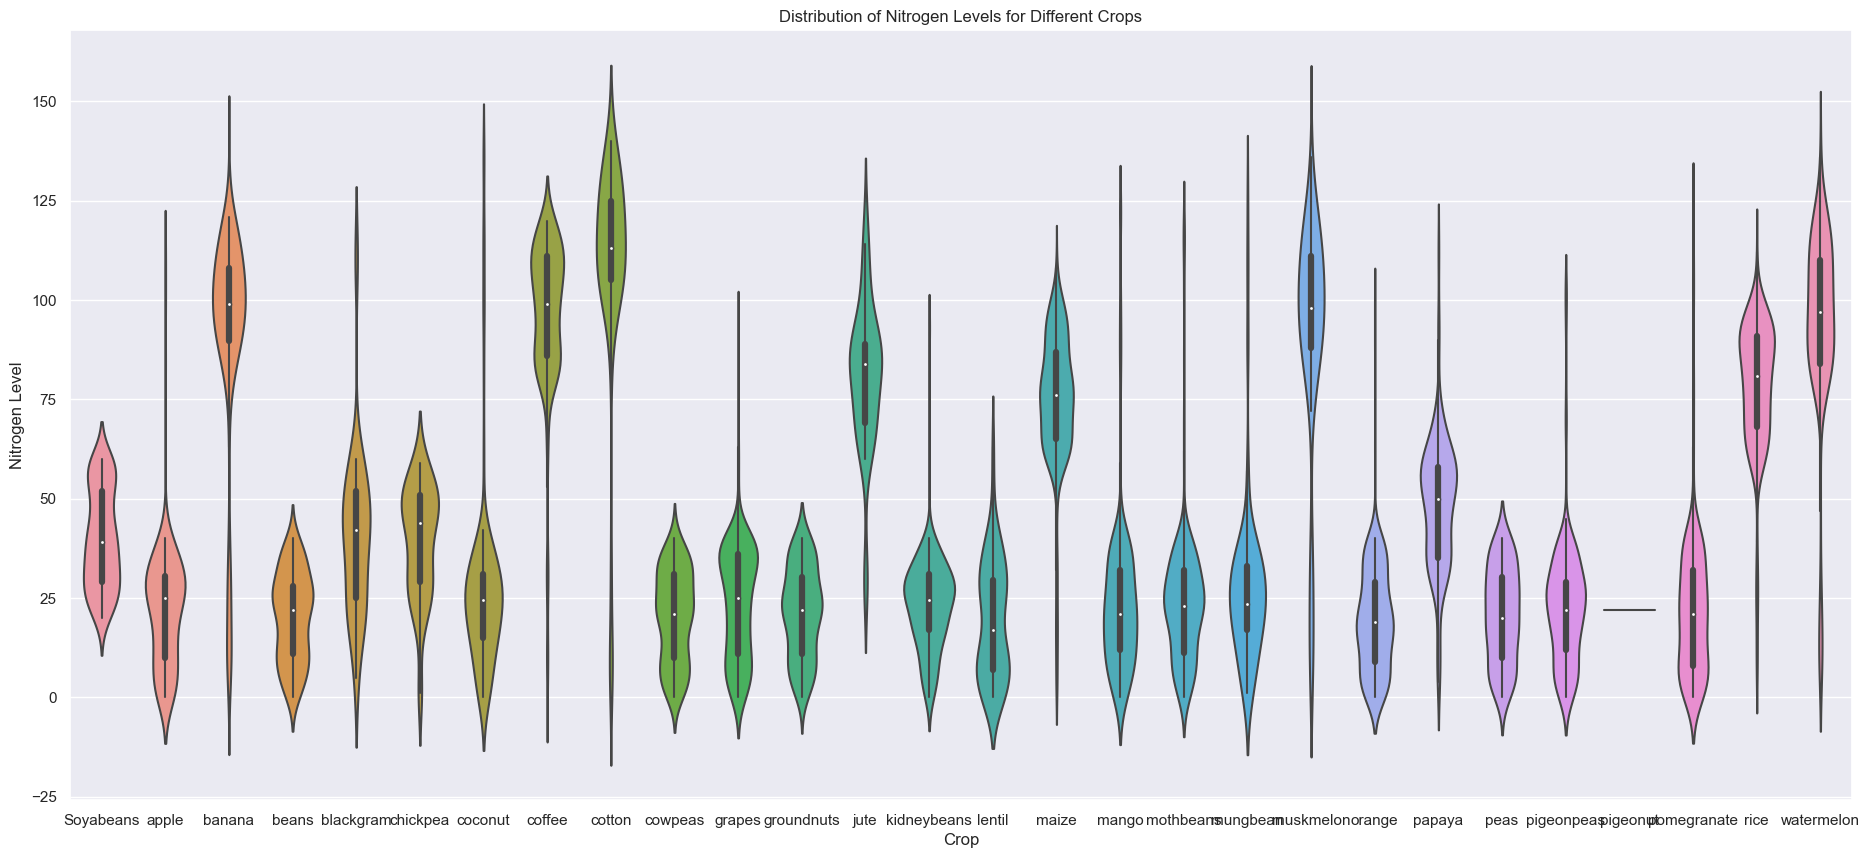

In [34]:
plt.figure(figsize=(23, 10))
sns.violinplot(x='label', y='N', data=ds)
plt.title('Distribution of Nitrogen Levels for Different Crops')
plt.xlabel('Crop')
plt.ylabel('Nitrogen Level')
plt.show()


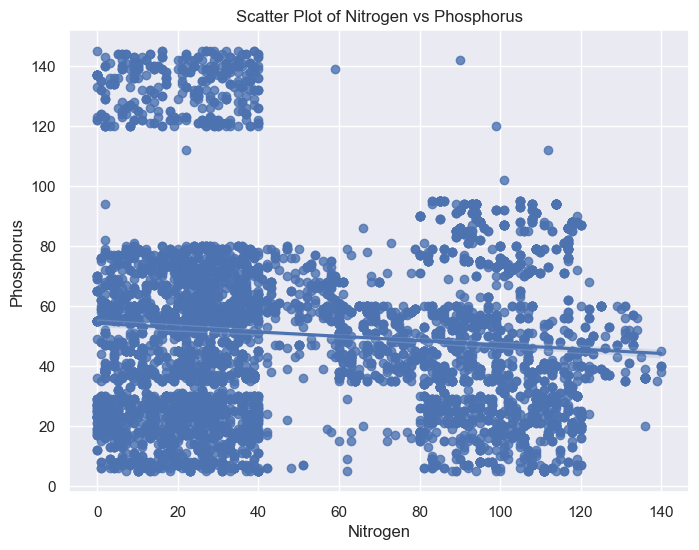

In [36]:
plt.figure(figsize=(8, 6))
sns.regplot(x='N', y='P', data=ds)
plt.title('Scatter Plot of Nitrogen vs Phosphorus')
plt.xlabel('Nitrogen')
plt.ylabel('Phosphorus')
plt.show()


C:\Users\ZaK_ARia\AppData\Local\Temp\ipykernel_3664\965427350.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_nutrients = df.groupby('label')['N', 'P', 'K'].mean().reset_index()


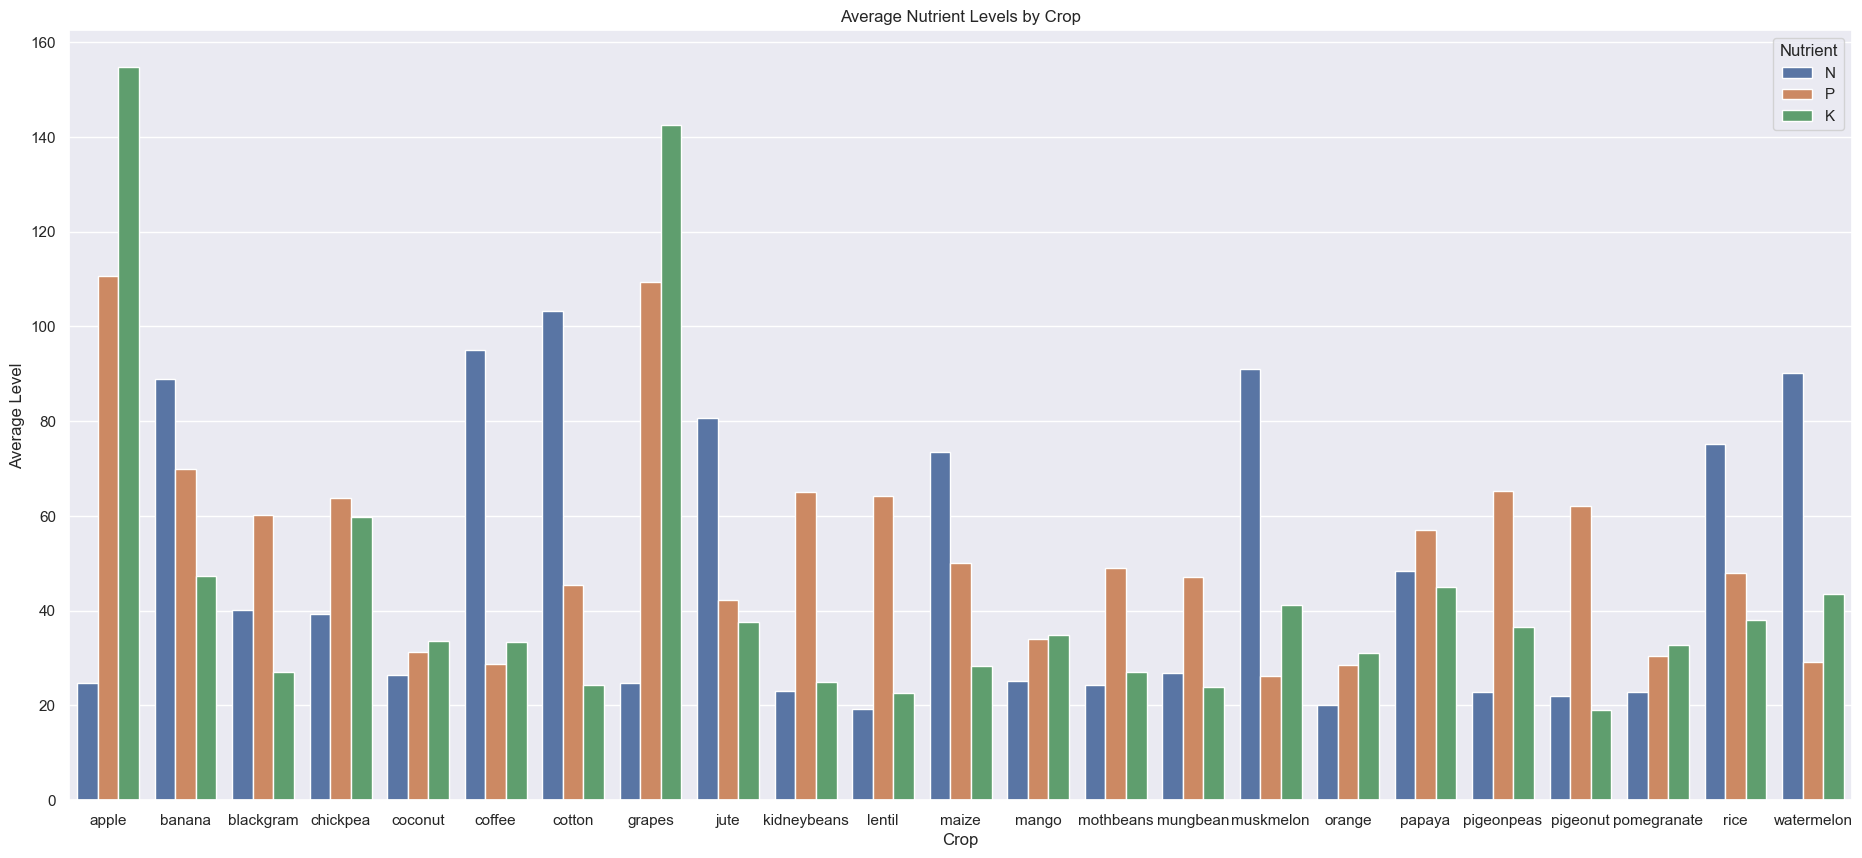

In [40]:
avg_nutrients = df.groupby('label')['N', 'P', 'K'].mean().reset_index()

plt.figure(figsize=(23, 10))
sns.barplot(x='label', y='value', hue='variable', data=pd.melt(avg_nutrients, id_vars=['label'], value_vars=['N', 'P', 'K']))
plt.title('Average Nutrient Levels by Crop')
plt.xlabel('Crop')
plt.ylabel('Average Level')
plt.legend(title='Nutrient')
plt.show()
